## Introduction


Many of the students at Pitt are smart enough to not bring their car to campus. This is most likely because of the city environment, making nearly every destination available by walking or public transportation. But if you did bring your car, what neighborhoods should you avoid?

## Our Metric

We decided to find the worst neighborhood to drive through in Pittsburgh. We used the following metrics to find the worst:

- Yearly Crashes per Neighborhood
- Daily Traffic Counts per Neighborhood
- Speed Humps in Each Neighborhood

We used the following datasets to calculate these metrics


- [Number of Crashes (2021)](https://data.wprdc.org/dataset/allegheny-county-crash-data)

Contains data of every crash in Allegheny county from 2021 (Decided to only do 2021 instead of 2004-2021 because it took an unbearable amount of time to use). By pairing with Neighborhoods dataset(see below) we will match each crash to its respective neighborhood. More crashes means a neighborhood is worse to drive in.

- [Number of Speed Humps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps/resource/37b2ac41-ae8e-4de1-8405-157e05dc3640)

Contains counts of speed humps in each neighborhood in Pittsburgh, the more speed humps, the worse the neighborhood is.  

- [Traffic Count](https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167)

Contains daily count of cars that drive through each neighborhood. The more cars, the more traffic.

- [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

Details the boundaries of each neighborhood so we are able to place the crashes within their respective neighborhoods. 

# Speed Bumps by Neighborhood
#### By: Jake Kressley
Dataset: [City of Pittsburgh Speed Humps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps/resource/37b2ac41-ae8e-4de1-8405-157e05dc3640)

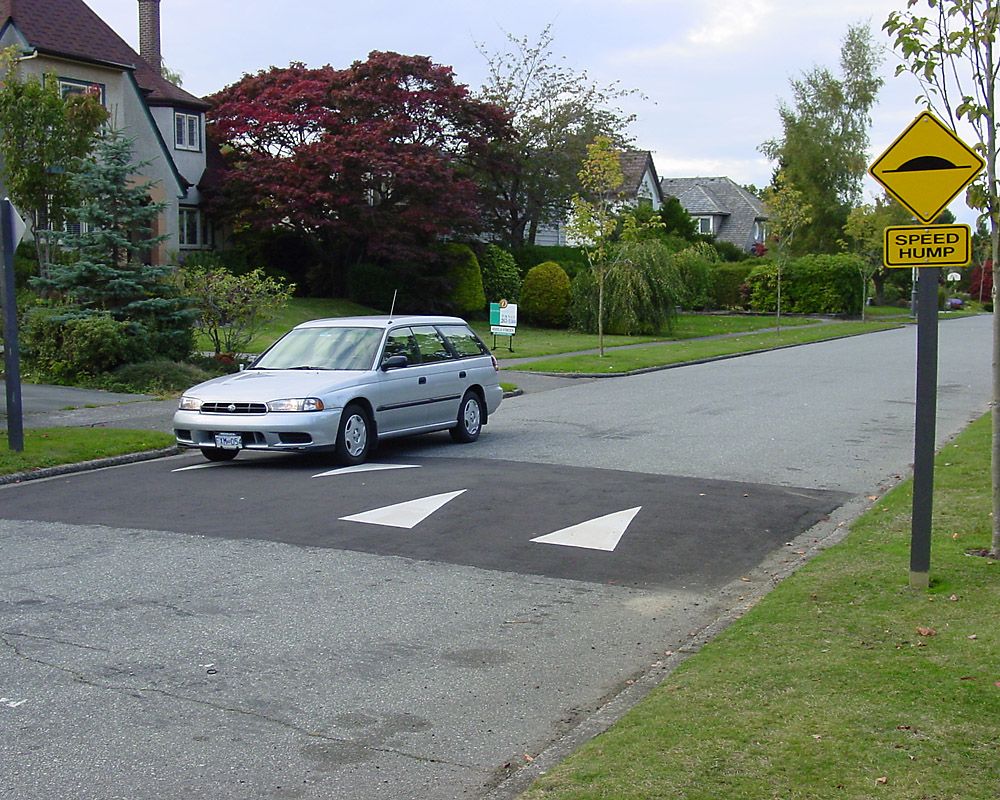

## Setting Up the Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

To start let's load in the speed bumps data.

In [2]:
speed_humps_df = pd.read_csv("data/speed-humps.csv")
speed_humps_df.head(5)

id  hump_id  locator_address_number locator_street  pavement  \
0   430808404        1                  4337.0      Saline St      9257   
1  1520886592        2                     NaN   Summerset Dr     15346   
2   858537521        3                   511.0       Gold Way      1755   
3   297775878        4                   547.0       Gold Way      1755   
4  1061197751        5                   593.0       Gold Way      1755   

  speed_hump_material         neighborhood  council_district  ward  \
0             Asphalt  Squirrel Hill South                 5    14   
1                 NaN  Squirrel Hill South                 5    14   
2             Asphalt        North Oakland                 6     5   
3             Asphalt        North Oakland                 6     5   
4             Asphalt        North Oakland                 6     5   

         tract  public_works_division  pli_division  police_zone fire_zone  \
0  42003141400                      3            14            4      2-15   
1  42003141400                      3            14            4      2-20   
2  42003562000                      3             5            4      2-23   
3  42003562000                      3             5            4      2-23   
4  42003562000                      3             5            4      2-23   

    latitude  longitude  
0  40.419835 -79.926062  
1  40.425040 -79.912040  
2  40.456746 -79.954521  
3  40.457333 -79.954899  
4  40.458061 -79.955355

Next let's filter out the unnessessary columns to make the data look a little more readable. 

In [3]:
# Create a new dataframe
speedhumps = pd.DataFrame(columns = ["Neighborhood", "Hump_ID"])

# Add the desired data to the dataframe
speedhumps["Neighborhood"] = speed_humps_df["neighborhood"]
speedhumps["Hump_ID"] = speed_humps_df["hump_id"]

speedhumps.head(5)

Neighborhood  Hump_ID
0  Squirrel Hill South        1
1  Squirrel Hill South        2
2        North Oakland        3
3        North Oakland        4
4        North Oakland        5

Since this csv tracks by individual speed hump and not how many there are in a neighborhood, we will have to create a hash map to track how many speed bumps are in each neighborhood.

In [4]:
# define the dictionary that will store the data
speedhump_dict = {}

for i, row in speedhumps.iterrows():
    neighborhood = row["Neighborhood"]
    
    if neighborhood not in speedhump_dict.keys():
        speedhump_dict.update({neighborhood: 1})
    else:
        speedhump_dict[neighborhood] += 1

speedhumps_df = pd.DataFrame.from_dict(speedhump_dict, orient = "index")
speedhumps_df.columns = ["Speed Humps"]

speedhumps_df.head()

Speed Humps
Squirrel Hill South           18
North Oakland                  6
Brookline                      4
Bloomfield                     3
Polish Hill                    6

(If a neighborhood does not have any values it is safe to assume that there are no speedbumps in that neighborhood.)

Now we can sort the data in descending order to find which neighborhoods have the highest amount of speed humps.

In [5]:
speedhumps_df = speedhumps_df.sort_values("Speed Humps", ascending=False)
speedhumps_df

Speed Humps
Squirrel Hill South           18
Carrick                        9
Polish Hill                    6
North Oakland                  6
Upper Hill                     4
Brookline                      4
Homewood South                 4
South Side Slopes              4
Perry North                    4
Garfield                       3
Squirrel Hill North            3
South Side Flats               3
Mount Washington               3
Bloomfield                     3
Highland Park                  2
Central Oakland                1
Stanton Heights                1
Overbrook                      1

We can now create a graph that visually shows how many speed humps are in each neighborhood

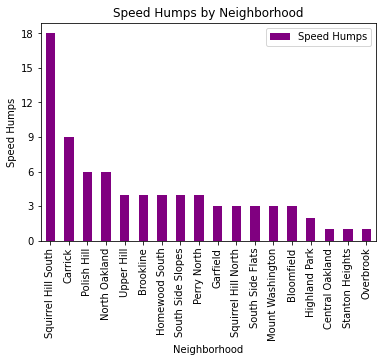

In [6]:
speedhumps_plt = speedhumps_df.plot(kind='bar', 
                                    title="Speed Humps by Neighborhood", 
                                    color='purple', 
                                    )

speedhumps_plt.set_xlabel("Neighborhood")
speedhumps_plt.set_ylabel("Speed Humps")
speedhumps_plt.set_yticks(range(0, speedhumps_df["Speed Humps"].max() + 1, 3))
plt.show()

From this data you can see that Squirrel Hill South has the most speed bumps.

Eventually we will gather the results of all of our datasets so it would be smart to create a new dataframe now and save the metrics throughout the project.

In [7]:
final_rankings = pd.DataFrame(columns = ["Neighborhood", "Humps Rank", "Traffic Rank", "Crashes Rank"])
final_rankings["Neighborhood"] = speedhumps_df.index
final_rankings["Humps Rank"] = 0
final_rankings["Traffic Rank"] = 0
final_rankings["Crashes Rank"] = 0

rank = 1
for neighborhood in speedhumps_df.index:
    final_rankings.loc[final_rankings["Neighborhood"] == neighborhood, "Humps Rank"] = rank
    rank += 1
    
final_rankings.sort_values("Humps Rank")

Neighborhood  Humps Rank  Traffic Rank  Crashes Rank
0   Squirrel Hill South           1             0             0
1               Carrick           2             0             0
2           Polish Hill           3             0             0
3         North Oakland           4             0             0
4            Upper Hill           5             0             0
5             Brookline           6             0             0
6        Homewood South           7             0             0
7     South Side Slopes           8             0             0
8           Perry North           9             0             0
9              Garfield          10             0             0
10  Squirrel Hill North          11             0             0
11     South Side Flats          12             0             0
12     Mount Washington          13             0             0
13           Bloomfield          14             0             0
14        Highland Park          15             0             0
15      Central Oakland          16             0             0
16      Stanton Heights          17             0             0
17            Overbrook          18             0             0

For our collective final rankings we must make sure every neighborhood has at least some value. Therefore, we will assign every neighborhood that does not have any humps rank of 19. This will not affect the final rankings much, as you will see later.

But first we must make a dataframe of every neighborhood in the neighborhoods data file.

In [8]:
import geopandas as gpd
neighborhood_data = gpd.read_file('data/pittsburghpaneighborhoods-/Neighborhoods_.shp')

neighborhood_names = pd.DataFrame(columns = ["Neighborhood"])
neighborhood_names["Neighborhood"] = neighborhood_data["hood"]
# checks for duplicates
neighborhood_names = neighborhood_names.drop_duplicates()

neighborhood_names

Neighborhood
0    Point Breeze North
1   Squirrel Hill North
2              Garfield
3     Bedford Dwellings
4             Knoxville
..                  ...
85        Regent Square
86      Terrace Village
87              Elliott
88     South Side Flats
89             Fineview

[90 rows x 1 columns]

Now that we have the name of every neighborhood we are planning on using, we can assign the rank of 19 to all neighborhoods without data.

In [9]:
for index, row in neighborhood_names.iterrows():
    name = row['Neighborhood']
    if name not in final_rankings['Neighborhood'].values:
        new_row = pd.DataFrame({"Neighborhood": [name], "Humps Rank": [19], "Traffic Rank": [0], "Crashes Rank": [0]})
        final_rankings = pd.concat([final_rankings, new_row], ignore_index=True)

final_rankings.sort_values("Humps Rank")

Neighborhood  Humps Rank  Traffic Rank  Crashes Rank
0         Squirrel Hill South           1             0             0
1                     Carrick           2             0             0
2                 Polish Hill           3             0             0
3               North Oakland           4             0             0
4                  Upper Hill           5             0             0
..                        ...         ...           ...           ...
38                Beltzhoover          19             0             0
37                       Hays          19             0             0
36                  Fairywood          19             0             0
52  Central Business District          19             0             0
89                   Fineview          19             0             0

[90 rows x 4 columns]

# Traffic Count and Safety of Neighborhoods in Pittsburgh

By: Vishal Suthakar


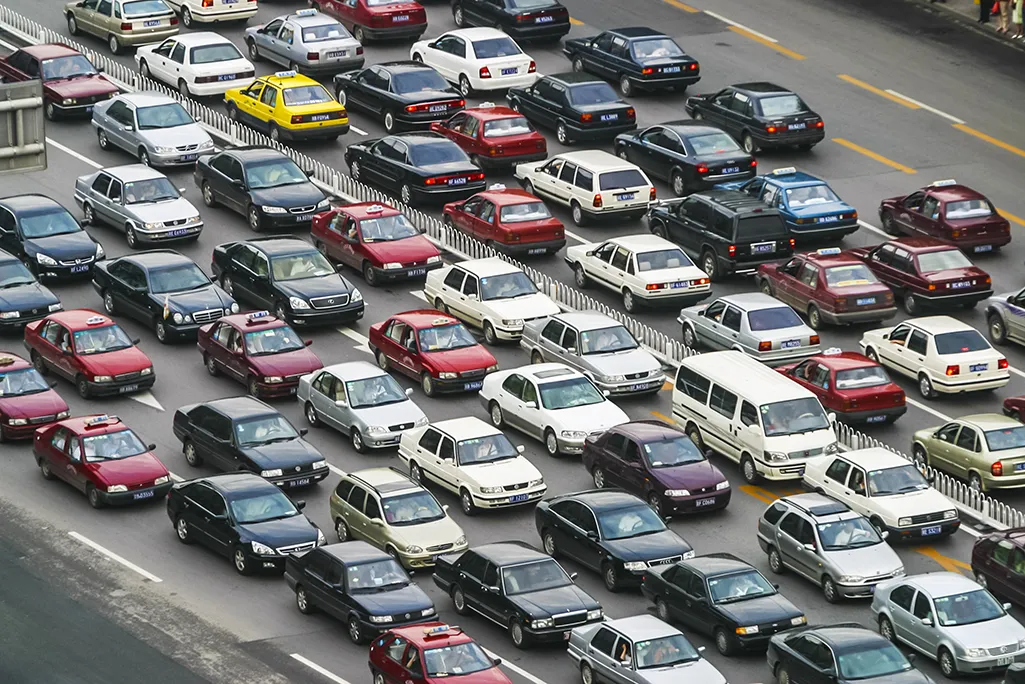

## First we have to import pandas. Then we import the data in from the csv file.

In [10]:
import pandas as pd
df=pd.read_csv("TrafficCount.csv")
print(df)

             id  device_id    record_oid count_start_date count_end_date  \
0    1011743669         85  1.445865e+09       2019-04-18     2019-04-26   
1    1026101993        140  1.121444e+09       2019-01-24            NaN   
2    1032382575         11  1.539893e+09       2018-08-28     2018-09-04   
3     103627606          9  7.341951e+08       2018-07-17     2018-08-01   
4    1039546167        144           NaN              NaN            NaN   
..          ...        ...           ...              ...            ...   
415  1132416719        434           NaN              NaN            NaN   
416  1037219067        435           NaN              NaN            NaN   
417  1329604877        436  1.001259e+09       2021-07-21            NaN   
418   704127706        437  1.832664e+09       2021-07-21            NaN   
419  1814538648        438  1.741899e+09       2021-07-21            NaN   

     average_daily_car_traffic  average_daily_bike_traffic counter_number  \
0         



## This is too much data to look through to find what we need. We are trying to calculate the amount of traffic, and the safety on the road, by neighborhoods.



### First: Amount of Traffic

Let's only use the average_daily_car_traffic and the neighborhood columns so we can see what neighborhood has the most traffic. 

In [11]:
df=pd.read_csv("TrafficCount.csv",usecols=['average_daily_car_traffic','neighborhood'])
sorted_df=df.sort_values(by='average_daily_car_traffic', ascending=False)
sorted_df

average_daily_car_traffic      neighborhood
39                     16729.0     Regent Square
111                    16711.0    Strip District
199                    15000.0        Bloomfield
93                     13788.0        East Hills
37                     12335.0      Point Breeze
..                         ...               ...
415                        NaN       Summer Hill
416                        NaN  Brighton Heights
417                        NaN        Upper Hill
418                        NaN       Middle Hill
419                        NaN  Crawford-Roberts

[420 rows x 2 columns]

We should now remove all NaN values from that dataset

In [12]:
sorted_df = sorted_df.dropna()

sorted_df

average_daily_car_traffic           neighborhood
39                     16729.0          Regent Square
111                    16711.0         Strip District
199                    15000.0             Bloomfield
93                     13788.0             East Hills
37                     12335.0           Point Breeze
..                         ...                    ...
258                       79.0          Highland Park
247                       77.0             Bloomfield
307                       63.0  Spring Hill-City View
251                       58.0           East Liberty
182                       23.0      Central Northside

[285 rows x 2 columns]

We must now make sure we are only using the neighborhoods in the final_rankings dataframe.

After sorting the values, we can see the top 10 neighborhoods with the most traffic are Regent Square, Strip District, Bloomfield, East Hills, Point Breeze, Crafton Heights, North Shore, Shadyside, Squirrel Hill North, and Brookline.

Now we will rank the neighborhoods based on their average_daily_car_traffic and add these rankings to the final rankings in the Traffic Rank column

In [30]:
rank = 1
for index, neighborhood in sorted_df.iterrows():
    name = neighborhood['neighborhood']
    final_rankings.loc[final_rankings["Neighborhood"] == name, "Traffic Rank"] = rank
    rank += 1
    
final_rankings = final_rankings.sort_values("Traffic Rank")
final_rankings.sort_values("Traffic Rank")

Neighborhood  Humps Rank  Traffic Rank  Crashes Rank   HTC
86          Regent Square          19             1            61  32.8
45        Crafton Heights          19             6            45  25.2
41            North Shore          19             7            10   8.1
82         Strip District          19            54             9   8.0
23       Duquesne Heights          19            58            30  18.9
..                    ...         ...           ...           ...   ...
14          Highland Park          15           281            40  45.5
13             Bloomfield          14           282            14  32.8
72  Spring Hill-City View          19           283            47  50.2
25           East Liberty          19           284            16  35.1
49      Central Northside          19           285            43  49.0

[64 rows x 5 columns]

Since this dataframe displays some neighborhoods that are not in the initial dataset of neighborhoods we must remove them then calculate the proper ranks.

In [15]:
# remove all neighborhoods with a 0 Traffic rank
final_rankings = final_rankings.loc[final_rankings['Traffic Rank'] != 0]

# recalculate ranks after neighborhoods removed
rank = 1
for index, neighborhood in final_rankings.iterrows():
    name = neighborhood['Neighborhood']
    final_rankings.loc[final_rankings["Neighborhood"] == name, "Traffic Rank"] = rank
    rank += 1

final_rankings.sort_values("Traffic Rank")

Neighborhood  Humps Rank  Traffic Rank  Crashes Rank
86          Regent Square          19             1             0
45        Crafton Heights          19             2             0
41            North Shore          19             3             0
82         Strip District          19             4             0
23       Duquesne Heights          19             5             0
..                    ...         ...           ...           ...
14          Highland Park          15            60             0
13             Bloomfield          14            61             0
72  Spring Hill-City View          19            62             0
25           East Liberty          19            63             0
49      Central Northside          19            64             0

[64 rows x 4 columns]

### Next: Safety on the Road
#### In this scenario, the most significant value is the percent of drivers who were driving over the speed limit. Again, we need the inplace to be true, and the neighborhood column to actually use the data.

In [16]:
import pandas as pd
import numpy as np
df=pd.read_csv("TrafficCount.csv",usecols=['percent_over_limit','neighborhood'])
df2=df.sort_values(by='percent_over_limit',inplace=True,ascending=False)
df.head(10)

percent_over_limit         neighborhood
93                 98.0           East Hills
70                 98.0           Manchester
14                 98.0      Crafton Heights
370                97.0  Squirrel Hill South
311                97.0           Manchester
240                97.0  Squirrel Hill South
129                97.0          Perry North
142                97.0              Elliott
162                97.0         Point Breeze
41                 97.0         East Liberty

After sorting the values, the top 10 highest percentage of over the speed limit drivers were East Hills, Manchester, Crafton Heights, Perry North, Point Breeze, and East Liberty.

We have decided not to include this data in our final outcome.


# Number of Crashes by Neighborhood
### By: Jake Kressley

Datasets: 

[Allegheny County Crash Data (2021)](https://data.wprdc.org/dataset/allegheny-county-crash-data)

[Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

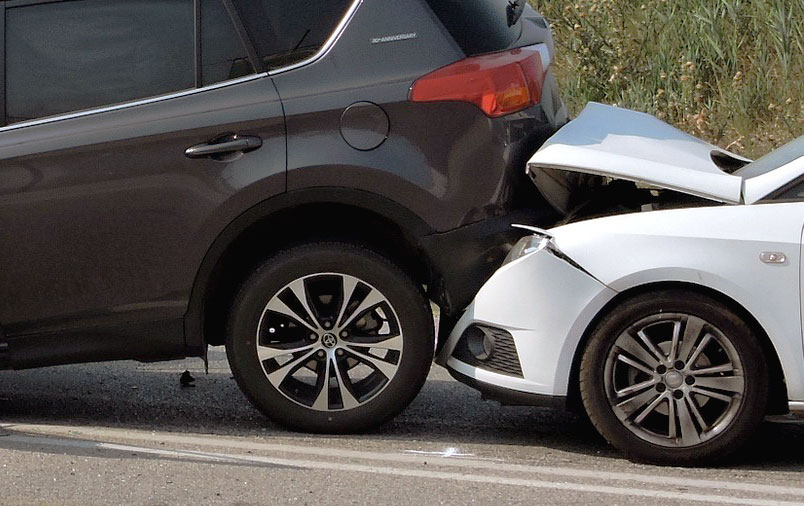

Let's start the same way as last time by importing and setting up the notebook.

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Now we can load in our crash data.

In [18]:
crash_data = pd.read_csv('data/crash-data.csv', low_memory=False)

crash_data.head(3)

CRASH_CRN  DISTRICT  CRASH_COUNTY  MUNICIPALITY POLICE_AGCY  CRASH_YEAR  \
0  2021000002        11             2          2113       02113        2021   
1  2021000007        11             2          2113       02113        2021   
2  2021000017        11             2          2301       02301        2021   

   CRASH_MONTH  DAY_OF_WEEK  TIME_OF_DAY  HOUR_OF_DAY  ...  LANE_COUNT  \
0            1            6         28.0          0.0  ...         2.0   
1            1            6        100.0          1.0  ...        99.0   
2            1            6        140.0          1.0  ...         2.0   

   RDWY_ORIENT  ROAD_OWNER  ROUTE  SPEED_LIMIT  SEGMENT  OFFSET  STREET_NAME  \
0            N           2   0130         35.0    142.0   490.0    BEULAH RD   
1            U           4    NaN          NaN      NaN     NaN   LAKETON RD   
2            N           4    NaN         25.0      NaN     NaN   SARANAC AV   

   TOT_INJ_COUNT  SCHOOL_BUS_UNIT  
0              4              NaN  
1              0              NaN  
2              0              NaN  

[3 rows x 190 columns]

Evidently, this data set does not include the specific neighborhood which an incident occured in. However, it does have the latitude and longitudinal coordinates, so we can manually find the neighborhood each crash occured in.

Still, we can make this table a little more readable.

In [19]:
crashes = pd.DataFrame(columns = ["Crash ID", "Latitude", "Longitude"])
crashes["Crash ID"] = crash_data["CRASH_CRN"]
crashes["Latitude"] = crash_data["DEC_LAT"]
crashes["Longitude"] = crash_data["DEC_LONG"]

crashes.head(3)

Crash ID  Latitude  Longitude
0  2021000002   40.4525   -79.8444
1  2021000007   40.4602   -79.8426
2  2021000017   40.3992   -80.0250

Almost there we just need to remove NaN values

In [20]:
# removes a row if either latitude or longitude have a null value
filtered_crashes = crashes[crashes[['Latitude', 'Longitude']].notnull().all(1)]

filtered_crashes = filtered_crashes.iloc[:10000]

filtered_crashes

Crash ID  Latitude  Longitude
0      2021000002   40.4525   -79.8444
1      2021000007   40.4602   -79.8426
2      2021000017   40.3992   -80.0250
3      2021000020   40.4626   -79.8040
4      2021000026   40.3497   -79.8561
...           ...       ...        ...
10000  2021111471   40.4778   -79.7359
10001  2021111472   40.4390   -80.0157
10002  2021111489   40.4147   -79.8487
10003  2021111493   40.4054   -79.9114
10004  2021111495   40.5101   -79.7967

[10000 rows x 3 columns]

(Decided to only do the last 10,000 since it takes forever to load with over 100,000 different crashes)

Now we need to figure out which neighborhood each crash occured in. To do this we will first have to load in our neighborhood data.

In [21]:
neighborhood_data = gpd.read_file('data/pittsburghpaneighborhoods-/Neighborhoods_.shp')

neighborhood_data.head(3)

OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0         1         233        42        003    140500          3   
1         2         203        42        003    140100          3   
2         3          86        42        003    101700          2   

        geoid10     namelsad10 mtfcc10 funcstat10  ...  created_us  \
0  420031405003  Block Group 3   G5030          S  ...         SDE   
1  420031401003  Block Group 3   G5030          S  ...         SDE   
2  420031017002  Block Group 2   G5030          S  ...         SDE   

   created_da last_edite  last_edi_1  temp  pghdb_sde_  \
0  2020-08-14        SDE  2020-08-14  None   7968760.0   
1  2020-08-14        SDE  2020-08-14  None  34078712.0   
2  2020-08-14        SDE  2020-08-14  None  12751163.0   

                               GlobalID    Shape__Are    Shape__Len  \
0  a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0  8.153647e+06  14047.065024   
1  20d4605b-258e-441a-a57e-a28fdabb6d30  3.407739e+07  30347.886823   
2  bf4065e7-c29c-48bd-b529-e7fd99077238  1.275116e+07  14577.441571   

                                            geometry  
0  POLYGON ((-79.90560 40.45522, -79.90553 40.455...  
1  POLYGON ((-79.91309 40.43804, -79.91321 40.438...  
2  POLYGON ((-79.93457 40.47217, -79.93455 40.472...  

[3 rows x 40 columns]

We will have to use the Geometry column to determine which crashes occur in which neighborhood. So let's make a new dataframe with only the desired columns

In [22]:
filtered_neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Geometry", "Crashes"])
filtered_neighborhoods["Neighborhood"] = neighborhood_data["hood"]
filtered_neighborhoods["Geometry"] = neighborhood_data["geometry"]

# Set the crash count to 0 so we can count them later.
filtered_neighborhoods["Crashes"] = 0

filtered_neighborhoods.head(3)

Neighborhood                                           Geometry  \
0   Point Breeze North  POLYGON ((-79.90560 40.45522, -79.90553 40.455...   
1  Squirrel Hill North  POLYGON ((-79.91309 40.43804, -79.91321 40.438...   
2             Garfield  POLYGON ((-79.93457 40.47217, -79.93455 40.472...   

   Crashes  
0        0  
1        0  
2        0

Now check each crash and calculate which neighborhood they occured in. We will do this by using the Point class. The point class has a contains() function that allows you to check if a certain point is contained in a group of points. 

In [23]:
from shapely.geometry import Point
crash_dict = {}

for i, crash in filtered_crashes.iterrows():
    # First, fix the point by using the correct latitude and longitude
    pt = Point(crash["Longitude"], crash["Latitude"])
    for j, neighborhood in filtered_neighborhoods.iterrows():
        # Check if the current neighborhood has the point
        if neighborhood["Geometry"].contains(pt):
            filtered_neighborhoods.at[j, 'Crashes'] = neighborhood["Crashes"] + 1
            break

filtered_neighborhoods.head()

Neighborhood                                           Geometry  \
0   Point Breeze North  POLYGON ((-79.90560 40.45522, -79.90553 40.455...   
1  Squirrel Hill North  POLYGON ((-79.91309 40.43804, -79.91321 40.438...   
2             Garfield  POLYGON ((-79.93457 40.47217, -79.93455 40.472...   
3    Bedford Dwellings  POLYGON ((-79.96601 40.45520, -79.96596 40.454...   
4            Knoxville  POLYGON ((-79.98845 40.41851, -79.98821 40.418...   

   Crashes  
0       37  
1       64  
2       19  
3       15  
4       31

Now we can sort the neighborhoods by which ones have the most crashes.

In [24]:
neighborhoods_sorted = filtered_neighborhoods.sort_values("Crashes", ascending=False)

neighborhoods_sorted

Neighborhood  \
80        Squirrel Hill South   
43  Central Business District   
88           South Side Flats   
27                 Greenfield   
51                    Carrick   
..                        ...   
50             Chartiers City   
37              New Homestead   
28              East Carnegie   
23                  Fairywood   
18          Arlington Heights   

                                             Geometry  Crashes  
80  POLYGON ((-79.94475 40.44101, -79.94405 40.440...      184  
43  POLYGON ((-79.99238 40.44484, -79.99233 40.444...      183  
88  POLYGON ((-79.97726 40.43272, -79.97725 40.432...      161  
27  POLYGON ((-79.92673 40.41886, -79.92692 40.418...      123  
51  POLYGON ((-79.99194 40.40719, -79.99191 40.407...      117  
..                                                ...      ...  
50  POLYGON ((-80.06919 40.46046, -80.06912 40.460...        3  
37  POLYGON ((-79.91621 40.39849, -79.91621 40.398...        3  
28  POLYGON ((-80.07255 40.42533, -80.07245 40.424...        3  
23  POLYGON ((-80.08808 40.45975, -80.08803 40.459...        3  
18  POLYGON ((-79.96568 40.41735, -79.96566 40.417...        0  

[90 rows x 3 columns]

We can see that Squirrel Hill South has the most crashes while Arlington Heights has the least.

Let's plot the data using GeoPandas to help us visualize it.

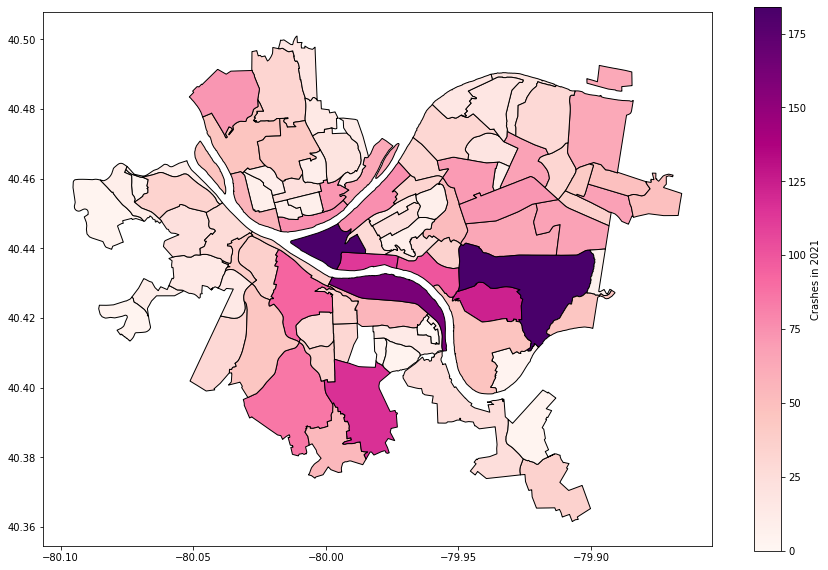

In [25]:
neighborhood_data["Crashes"] = filtered_neighborhoods["Crashes"]
neighborhood_data.plot(column="Crashes", 
                       legend=True,
                       edgecolor="black", 
                       cmap='RdPu',
                       legend_kwds={'label': 'Crashes in 2021'}, 
                       figsize=(15,10))

In the graph above, the lighter the color, the more crashes.

Now we must add these rankings to our final dataset.

In [26]:
rank = 1
for index, neighborhood in neighborhoods_sorted.iterrows():
    name = neighborhood["Neighborhood"]
    if name in final_rankings["Neighborhood"].values:
        final_rankings.loc[final_rankings["Neighborhood"] == neighborhood["Neighborhood"], "Crashes Rank"] = rank
        rank += 1
    else: 
        continue

final_rankings.sort_values("Crashes Rank")

Neighborhood  Humps Rank  Traffic Rank  Crashes Rank
0         Squirrel Hill South           1            54             1
52  Central Business District          19            15             2
11           South Side Flats          12            58             3
39                 Greenfield          19            33             4
1                     Carrick           2            50             5
..                        ...         ...           ...           ...
54           Allegheny Center          19            14            60
86              Regent Square          19             1            61
75                  St. Clair          19            13            62
57             Chartiers City          19            11            63
48              New Homestead          19            31            64

[64 rows x 4 columns]

Now that we have the rankings of all three categories, we can make our final ranking.

## Bringing it all together

We decided to weight each of our categories based on how we interpret their impact on "drivability". Since the number of speed humps is not nearly as important as traffic or accidents, we have decided to weight it as 10% of our final results. We have also weighted traffic count and accident count 40% and 50% respectively because we feel accident count is slightly more important. By doing this we will find which neighborhoods are higher in which important categories and also significantly lowering the chances of a tie.

In [27]:
final_rankings["HTC"] = final_rankings.apply(lambda row: (row["Humps Rank"] * .1) + (row["Traffic Rank"] * .4) + (row["Crashes Rank"] * .5), axis = 1)

final_rankings.head()

Neighborhood  Humps Rank  Traffic Rank  Crashes Rank   HTC
86     Regent Square          19             1            61  32.8
45   Crafton Heights          19             2            45  25.2
41       North Shore          19             3            10   8.1
82    Strip District          19             4             9   8.0
23  Duquesne Heights          19             5            30  18.9

Now if we sort by HTC we will see our top 10

In [28]:
final_rankings_sorted = final_rankings.sort_values("HTC")

final_rankings_sorted.head(10)

Neighborhood  Humps Rank  Traffic Rank  Crashes Rank   HTC
82             Strip District          19             4             9   8.0
41                North Shore          19             3            10   8.1
52  Central Business District          19            15             2   8.9
12           Mount Washington          13            17             7  11.6
35                      Bluff          19            24             6  14.5
3               North Oakland           4             8            22  14.6
6              Homewood South           7            16            15  14.6
55           Brighton Heights          19            19            12  15.5
53             East Allegheny          19            21            13  16.8
39                 Greenfield          19            33             4  17.1

As you can see we have our winners

### Coming in third place we have: Central Business District!

### In second place we have: North Shore

And by an incredibly small margin. The worst neighborhood to drive in in Pittsburgh is... 
## Strip District!

And in case you were curious this is what the geopandas graph of our metric looks like

<function matplotlib.pyplot.show(*args, **kw)>

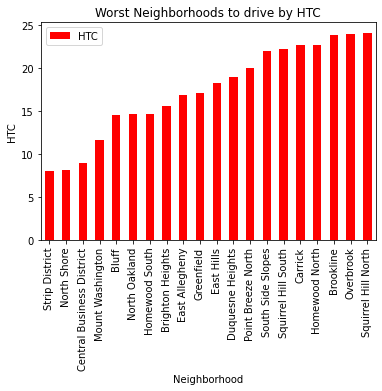

In [29]:
final_plt = final_rankings_sorted.iloc[:20].plot(kind='bar',
                                                title="Worst Neighborhoods to drive by HTC",
                                                color='red',
                                                 x='Neighborhood',
                                                 y='HTC'
                                                )

final_plt.set_xticklabels(final_rankings_sorted.iloc[:20]['Neighborhood'])
final_plt.set_ylabel("HTC")
plt.show

(Reminder: the higher number, the better)

# Conclusion

**Jake**: As a Non-Pittsburgher, these results don't really mean much to me. I am not sure I could tell you where more than 5 of these neighborhoods are even located. That being said, on the off chance I do bring my car to I know now which neighborhoods to avoid. It seems the more downtown you go the worse conditions it is to drive.